# A joint model CAR (model 2) 
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF] [ S | GMRF] $$

In [1]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')

In [2]:
rm(list=ls())                                                                                     
source("init_data.R")                                                                             
# load the building function                                                                      
source("joint.binomial.bymCAR.R")                                                                 


Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
dim(DataFrame)

[1] 4061   27

In [4]:
dim(rr)

ERROR: Error in eval(expr, envir, enclos): object 'rr' not found


In [4]:
dim(M_bis)

[1] 4060 4060

In [5]:
### Notas
## El postburnin es una mamada, quitar

In [195]:
n.sample = 20000
burnin= 10000
single_burnin = 1
postburnin = 2    
thin = 10
verbose = TRUE
c <- 1.001 # 
fixed_prior_gamma_shape_tau <- 1
prior_tau_scale <- 0.01
prior_sigma_scale <- 0.01
fixed_prior_gamma_shape_sigma <- 1

results  <- joint.binomial.bymCARModel2(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        burnin=burnin,
                                        single_burnin=single_burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE,
                                       prior.tau2=c(fixed_prior_gamma_shape_tau,prior_tau_scale),
                                       prior.sigma2=c(fixed_prior_gamma_shape_sigma,prior_sigma_scale),
                                        tau2_sigma2_denominator=c,
                                       #prior.tau2=c(0.1,1),
                                       #prior.sigma2=c(0.1,1),
                                       data = DataFrame)
                                       #data = rr)

## I put 5 ceros

[1] 1000
Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  8.1 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  6.9 seconds.
Sampling from the joint model 1000 post burnin and thinned (if requested) samples.
  |                                                                      |   0%[1] "common phi"
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


## Remember to check likelihood modelfit

In [196]:
#Change priors tau2 and sigma2
#0.1 , 0.01


In [197]:
results$S$modelfit

DIC           p.d          WAIC           p.w          LMPL 
          Inf           Inf    64336393.1    32014343.1    -1616449.7 
loglikelihood 
    -682079.1

In [198]:
results$P$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    65676.549      1224.169   3099919.717   1549232.816    -89440.203 
loglikelihood 
   -31614.105

In [163]:
results$S$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),8.4048,8.4048,8.4048,1000,NaN,0.0,NaN
Disttoroadm,-0.0007,-0.0007,-0.0007,1000,NaN,0.0,NaN
Populationm,-0.0002,-0.0002,-0.0002,1000,NaN,0.0,NaN
tau2,227.0670,187.1365,263.2384,1000,100,90.5,-0.8
sigma2,0.0005,0.0003,0.0008,1000,100,30.9,-3.1


## Independent models

In [164]:
results$ind.model.S$model.results


#################
#### Model fitted
#################
Likelihood model - Binomial (logit link function) 
Random effects model - BYM CAR
Regression equation - sample ~ Disttoroadm + Populationm
Number of missing observations - 731

############
#### Results
############
Posterior quantities and DIC

             Median    2.5%   97.5% n.sample % accept n.effective Geweke.diag
(Intercept)  1.9483  1.9335  1.9630        2      NaN           0         NaN
Disttoroadm -0.0002 -0.0002 -0.0002        2      NaN           0         NaN
Populationm  0.0001  0.0001  0.0001        2      NaN           0         NaN
tau2         1.3052  1.2966  1.3138        2      100           0         NaN
sigma2       0.2937  0.2931  0.2944        2      100           0         NaN

DIC =  2760.632       p.d =  4.481424       LMPL =  -1380.18 

In [165]:
results$ind.model.P$model.results


#################
#### Model fitted
#################
Likelihood model - Binomial (logit link function) 
Random effects model - BYM CAR
Regression equation - species ~ Elevationm + MeanTempm
Number of missing observations - 0

############
#### Results
############
Posterior quantities and DIC

             Median    2.5%   97.5% n.sample % accept n.effective Geweke.diag
(Intercept) -1.3281 -1.3312 -1.3250        2      NaN           0         NaN
Elevationm   0.0001  0.0001  0.0001        2      NaN           0         NaN
MeanTempm   -0.0009 -0.0009 -0.0009        2      NaN           0         NaN
tau2         0.8113  0.8017  0.8208        2      100           0         NaN
sigma2       0.1686  0.1634  0.1737        2      100           0         NaN

DIC =  2242.343       p.d =  2.556831       LMPL =  -1121.06 

In [166]:
## Remove samples, like a post post burnin
#post.sample_p = post.sample_p[(nrow(post.sample_p) - 8000) : nrow(post.sample_p),]
#post.presence_p = post.presence_p[(nrow(post.presence_p) - 8000) : nrow(post.presence_p),]

## Some plots and analysis for convergence


In [129]:
library(coda)

## $\tau^{2}$

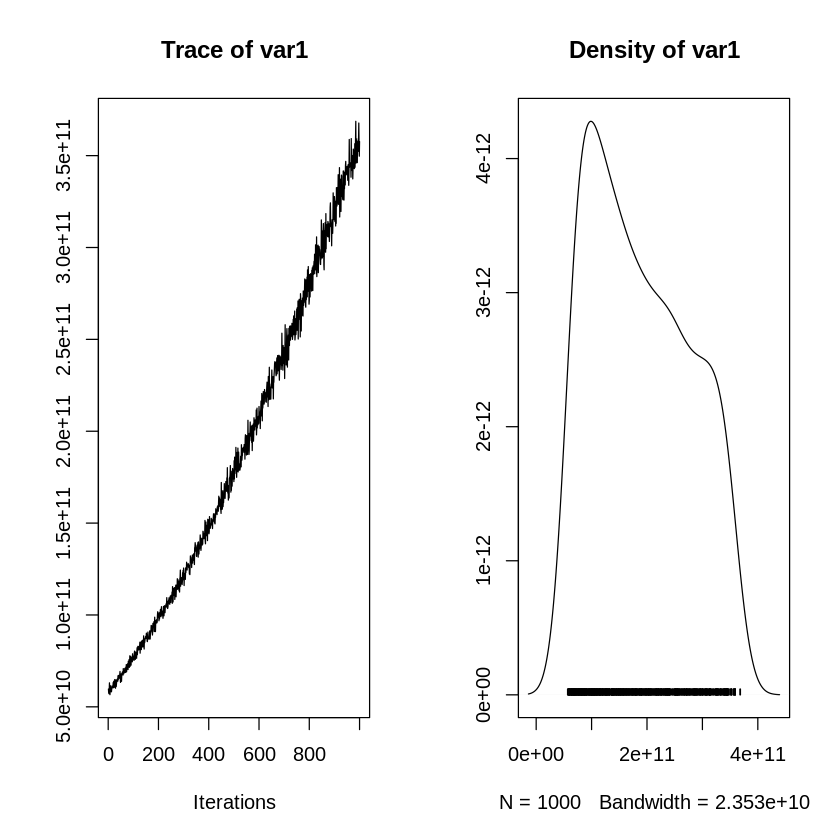

In [189]:
plot(results$S$samples$tau2)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

## $\sigma^2$

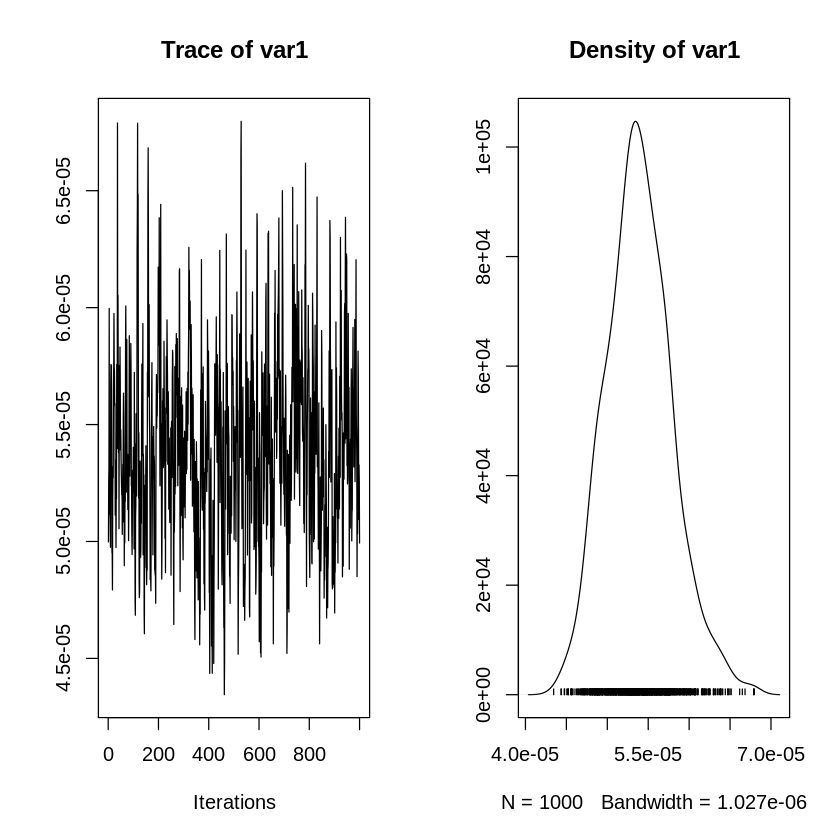

In [171]:
plot(results$S$samples$sigma2)
#plot(results$ind.model.S$model.results$samples$sigma2)
#plot(results$ind.model.P$model.results$samples$sigma2)

## $\beta$

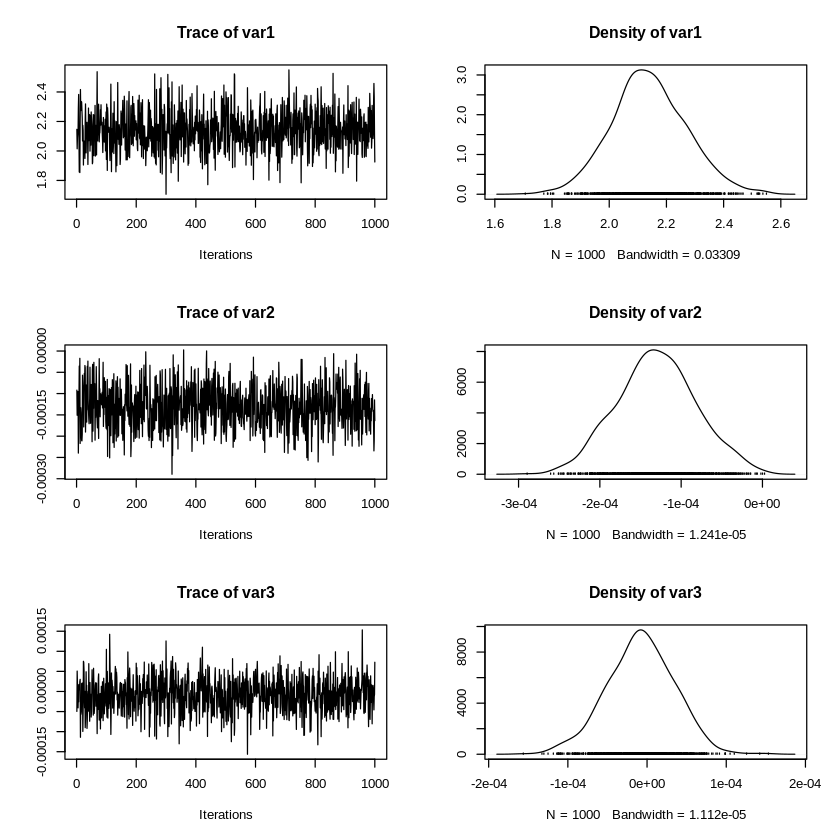

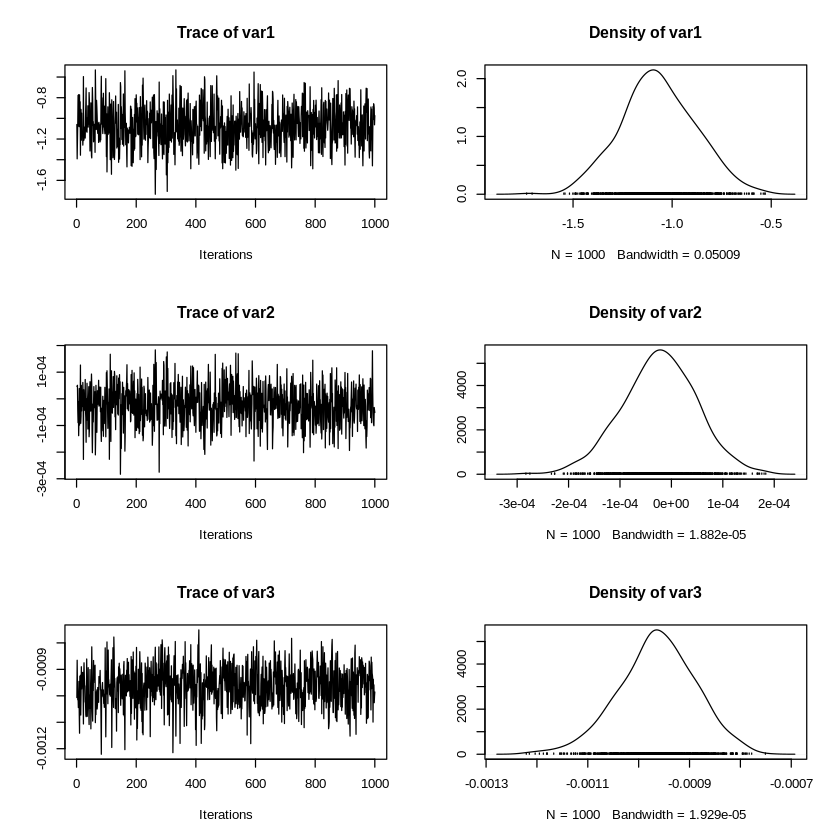

In [172]:
plot(results$S$samples$beta)
plot(results$P$sample$beta)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

## Diagnostics, Mr. Gelmans, et.al

In [173]:
post.sample_p = data.frame(results$S$samples$fitted)
post.presence_p = data.frame(results$P$samples$fitted)

## Sample the posterior 

In [174]:
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
pps <- post.presence_p %>% mutate_all(function(p) rbernoulli(1,p))                                        

In [175]:

sumpps <- colSums(pps)

In [176]:
sumpss <- colSums(pss)

In [177]:
nsample <- nrow(pred.P)
prob_pps <- sumpps / nsample


In [178]:
nsample <- nrow(pred.S)
prob_pss <- sumpss / nsample

In [179]:
probpres = prob_pps * prob_pss

In [180]:
## save to posterity
# Save output sample to display in python
## Save the complete chain trace for analysing in Python,
TDF = read.csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same
TDF = TDF[order(TDF$cell_ids),]

In [181]:
chain = cbind(TDF$cell_ids,probpres,prob_pps,prob_pss)
file_ = '/outputs/presence_only_models/modelCAR_model2_fitted.csv'
write.csv(chain,file_)

## Posterior análisis with a varying C $\tau^2, \sigma^2$ denominator

In [609]:
# Read the file
bfile = '/outputs/presence_only_models/joint-model2-benchmark-denominator.csv'
res <- read.csv(bfile)

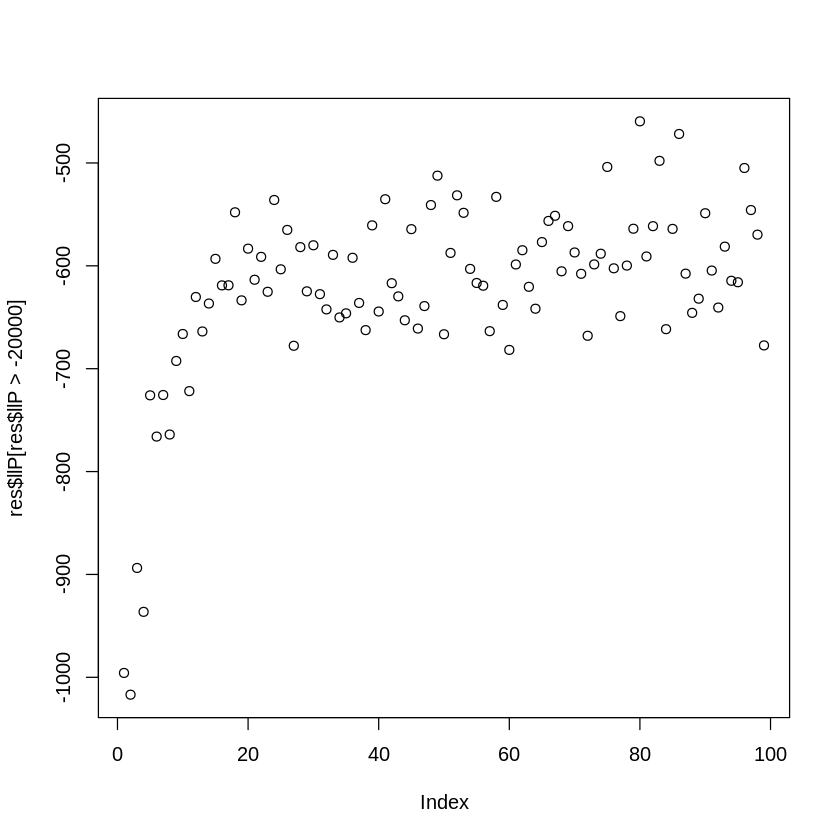